In [138]:
import os
import cv2 
import sys 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import albumentations as at 
import random as py_random
import matplotlib.pyplot as plt 

In [139]:
from IPython.display import SVG
from sklearn.model_selection import train_test_split 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import Sequential, Model, load_model   
from tensorflow.keras.layers import Activation, Dense, Input, Flatten, Dropout 
from tensorflow.keras.utils import to_categorical, Sequence, model_to_dot  
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler 

In [140]:
def set_random_seed(seed_value):
    py_random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def get_show_version():
    print(f"python version {sys.version}")
    print(f"numpy version {np.__version__}")
    print(f"tensorflow version {tf.__version__}")

def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape {images[i].shape}")

def get_show_image(images, labels, ncols=15):
    fig, axes = plt.subplots(3, 5)
    fig.set_size_inches(12, 10)
    for i in range(ncols):
        ax = axes[i//5, i%5]
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")
        ax.set_title(labels[i])
    plt.tight_layout()
    plt.show() 


In [141]:
set_random_seed(2022)
get_show_version()

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
tensorflow version 2.8.2


In [142]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [143]:
get_show_shape([x_train, y_train, x_test, y_test])

shape (60000, 28, 28)
shape (60000,)
shape (10000, 28, 28)
shape (10000,)


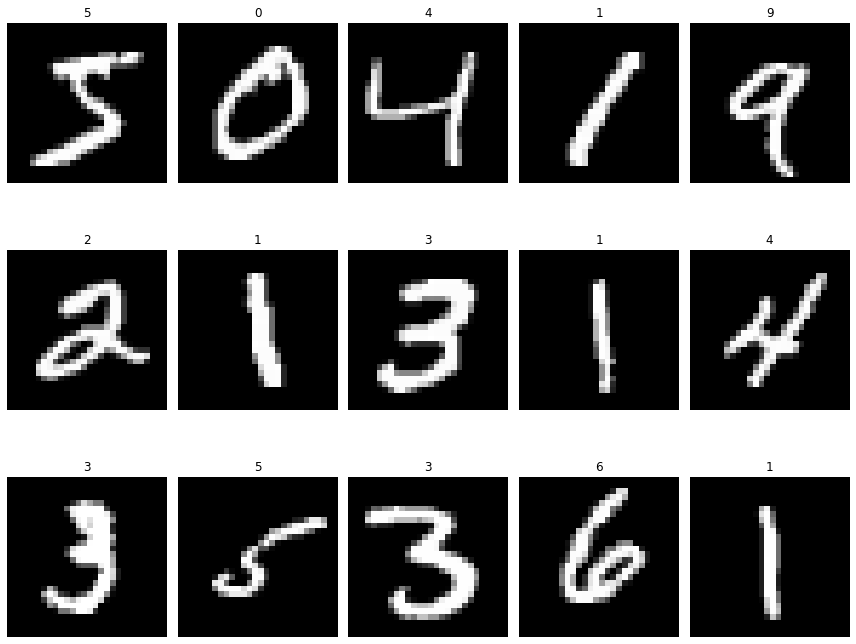

In [144]:
get_show_image(x_train[0:15], y_train[0:15], ncols=15)

In [145]:
def get_preprecessed(x_train):
    x_train  = x_train / x_train.max()
    return x_train

def get_preprocessed_one_hot_encoding(x_train, y_train):
    x_train = get_preprecessed(x_train)
    y_oh_data = to_categorical(y_train)
    return x_train, y_oh_data 

def get_train_test_split(x_train, y_train, x_test, y_test):
    x_train, y_oh_train = get_preprocessed_one_hot_encoding(x_train, y_train)
    x_test, y_oh_test = get_preprocessed_one_hot_encoding(x_test, y_test)
    x_tr, x_val, y_oh_tr, y_oh_val = train_test_split(x_train, y_oh_train, test_size=0.20, random_state=2022)

    return (x_tr, y_oh_tr), (x_val, y_oh_val), (x_test, y_oh_test)

In [159]:
def set_create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(256, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model 


In [147]:
(x_tr, y_oh_tr), (x_val, y_oh_val), (x_test, y_oh_test) = get_train_test_split(x_train, y_train, x_test, y_test)

In [148]:
get_show_shape([x_tr, y_oh_tr, x_val, y_oh_val, x_test, y_oh_test])

shape (48000, 28, 28)
shape (48000, 10)
shape (12000, 28, 28)
shape (12000, 10)
shape (10000, 28, 28)
shape (10000, 10)


In [149]:
IMAGE_SIZE= 28

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainab

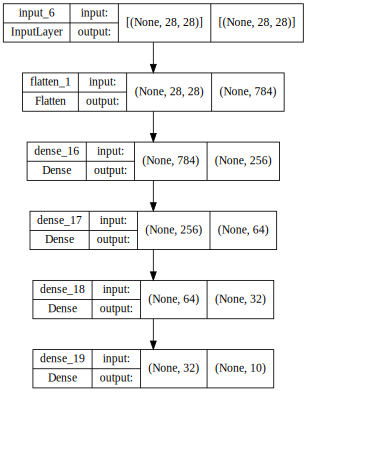

In [152]:
model = set_create_model()
SVG(model_to_dot(model,show_shapes=True, dpi=60).create(prog="dot", format="svg"))

In [155]:
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_tr, y_oh_tr,
          validation_data=(x_val, y_oh_val),
          epochs=10)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9243 - val_loss: 0.1371 - val_accuracy: 0.9591
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.1146 - val_accuracy: 0.9658
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0967 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0539 - accuracy: 0.9824 - val_loss: 0.1017 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 0.0922 - val_accuracy: 0.9756
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.1056 - val_accuracy: 0.9740
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.0883 - val_accuracy: 0.9762
Epo

In [156]:
model.save("./h5-model.h5")

In [157]:
h5_model = load_model("./h5-model.h5")
h5_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainab

In [158]:
loss, acc = h5_model.evaluate(x_test, y_oh_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09401, acc: 0.97720
